In [3]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaax
import imageio.v2 as imageio
import os
import glob
from imgaug import augmenters as iaa

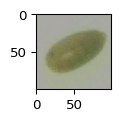

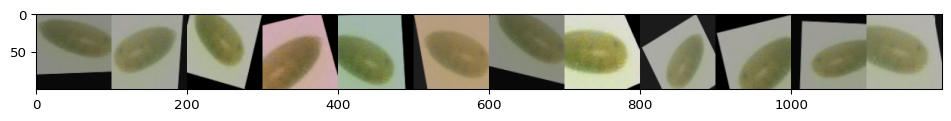

In [5]:
ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = []
# folder = "./before_aug/delta_day_3/train/0/"
path = "/home/jim/Documents/lacewing/transferlearning/raw_data/20221118_train_test_split/train/1"
save_path = f"/home/jim/Documents/lacewing/transferlearning/raw_data/20221118_augmentation/train/1"
for img in sorted(glob.glob(f"{path}/*.jpg")):
    images.append(imageio.imread(img))
    images.append(imageio.imread(img))
    images.append(imageio.imread(img))    
    images.append(imageio.imread(img))    
    images.append(imageio.imread(img))
    images.append(imageio.imread(img))
    images.append(imageio.imread(img))    
    images.append(imageio.imread(img)) 
    images.append(imageio.imread(img))
    images.append(imageio.imread(img))
    images.append(imageio.imread(img))    
    images.append(imageio.imread(img)) 
#     images = imageio.imread("before_aug/delta_day_3/train/0/4_ (3).jpg")

seq = iaa.Sequential([
    iaa.Resize(100),
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
#     iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    ),
#     iaa.SaltAndPepper(0.01)

], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)
# ia.imshow(np.hstack(images_aug))
ia.imshow(images[0])
ia.imshow(np.hstack(images_aug[0:12]))

# save augmented images
if not os.path.exists(save_path):
    os.makedirs(save_path)
for i, img in enumerate(images_aug):
    imageio.imwrite(f'{save_path}/{i}.jpg',img)


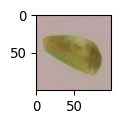

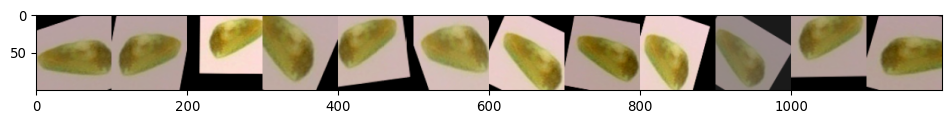

652